In [126]:
import numpy as np
from numpy.random import uniform
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import math

In [63]:
plt.rcParams.update({
    'font.size': 14,
    'text.usetex': True,
    'text.latex.preamble': r'\usepackage{amsfonts}'
})

In [3]:
sns.set_style("darkgrid")

FINAL_ANSWER = -0.285000121786337520496595853125521964791406671335409442929045293

In [44]:
def probabilityOneWinMC(q: float):
    N = 50_000
    one_wins = 0
    if q >= 1/2: return 1
    if q <= -1/2: return 0
    for i in range(N):
        flag = q
        turn = -1
        while abs(flag) < 1/2:
            turn *= -1
            flag += uniform() * turn
        if turn == 1: one_wins += 1
    return one_wins/N


In [143]:
x = np.linspace(-0.499, 0.5, 400)
y = np.vectorize(probabilityOneWinMC)(x)

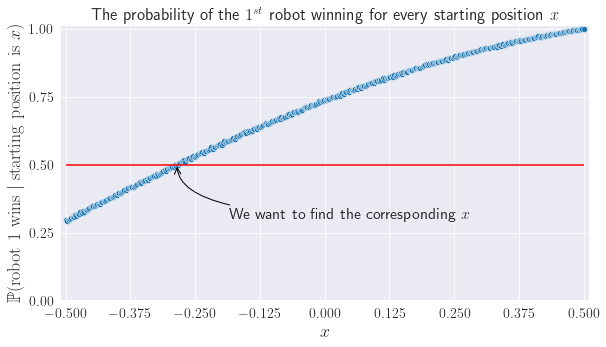

In [171]:
plt.rc("axes", labelsize=18)
g = sns.relplot(x=x, y=y, aspect=18/10, height=4.5)
g.set_axis_labels("$x$", "$\mathbb{P}(\mathrm{robot \ 1 \ wins} \mid \mathrm{starting \ position \ is \ } x)$")
plt.title("The probability of the $1^{st}$ robot winning for every starting position $x$.")
plt.xlim([-0.51, 0.51])
plt.ylim([0, 1.01])
plt.xticks(np.linspace(-0.5, 0.5, 9))
plt.yticks(np.linspace(0, 1, 5))
plt.hlines(0.5, -0.5, 0.5, color="red")
plt.annotate("We want to find the corresponding $x$", (FINAL_ANSWER, 0.5), xytext = (FINAL_ANSWER + 0.1, 0.5 - 0.2), arrowprops=dict(color='black',  arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90"), fontsize=16)
g.savefig("overview.svg")

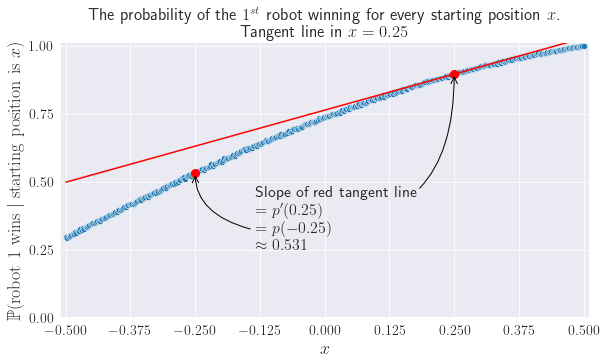

In [214]:
# Tangent line lines: x=0.250
# y = mx + b
# m = p'(0.25) = p(-0.25) \approx 0.531
# (0.25, 0.896) on y=mx+b
#  => 0.896 = 0.531 * 0.25 + b
# <=> b = 0.76325
          
xl = np.linspace(-0.499, 0.5, 1000)
yl = np.vectorize(lambda val: val * 0.531 + 0.76325)(xl)

g = sns.relplot(x=x, y=y, aspect=18/10, height=4.5)
g.set_axis_labels("$x$", "$\mathbb{P}(\mathrm{robot \ 1 \ wins} \mid \mathrm{starting \ position \ is \ } x)$")
plt.title("""The probability of the $1^{st}$ robot winning for every starting position $x$.
Tangent line in $x=0.25$""")
plt.xlim([-0.51, 0.51])
plt.ylim([0, 1.01])
plt.xticks(np.linspace(-0.5, 0.5, 9))
plt.yticks(np.linspace(0, 1, 5))
# plt.hlines(0.5, -0.5, 0.5, color="red")

plt.plot(xl, yl, color="red")
plt.plot([0.25], [0.896], marker="o", color="red", markersize=8)

plt.plot([-0.25], [0.531], marker="o", color="red", markersize=8)

plt.annotate("""Slope of red tangent line
$= p'(0.25)$
$= p(-0.25)$
$\\approx 0.531$""", (0.25, 0.896), xytext = (FINAL_ANSWER + 0.15, 0.5 - 0.25), arrowprops=dict(color='black',  arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90"), fontsize=16)

plt.annotate("""Slope of red tangent line
$= p'(0.25)$
$= p(-0.25)$
$\\approx 0.531$""", (-0.25, 0.531), alpha=0.0, xytext = (FINAL_ANSWER + 0.15, 0.5 - 0.32), arrowprops=dict(color='black',  arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90"), fontsize=16)


g.savefig("tangent.svg")

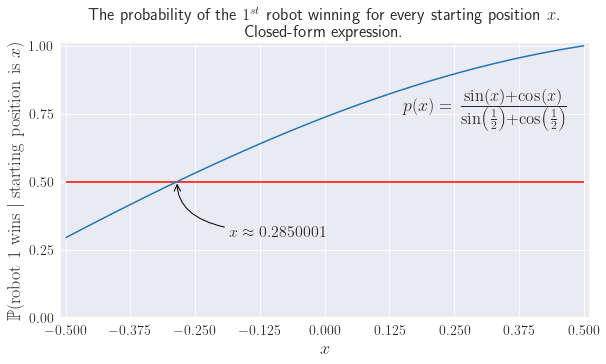

In [239]:
xclosedform = np.linspace(-0.499, 0.5, 1000)
yclosedform = np.vectorize(lambda val: (math.sin(val) + math.cos(val))/(math.sin(0.5) + math.cos(0.5)))(xclosedform)
g = sns.relplot(x=xclosedform, y=yclosedform, aspect=18/10, height=4.5, kind="line")
g.set_axis_labels("$x$", "$\mathbb{P}(\mathrm{robot \ 1 \ wins} \mid \mathrm{starting \ position \ is \ } x)$")
plt.title("""The probability of the $1^{st}$ robot winning for every starting position $x$.
Closed-form expression.""")
plt.xlim([-0.51, 0.51])
plt.ylim([0, 1.01])
plt.xticks(np.linspace(-0.5, 0.5, 9))
plt.yticks(np.linspace(0, 1, 5))
plt.hlines(0.5, -0.5, 0.5, color="red")
plt.annotate("$x \\approx 0.2850001$", (FINAL_ANSWER, 0.5), xytext = (FINAL_ANSWER + 0.1, 0.5 - 0.2), arrowprops=dict(color='black',  arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90"), fontsize=16)
plt.annotate("$p(x) =$", (0.150, 0.76), fontsize=18)
plt.annotate("$\\frac {\\sin(x) + \\cos(x)} {\\sin\\left(\\frac 1 2\\right) + \\cos\\left(\\frac 1 2\\right)}$", (0.263, 0.76), fontsize=24)
g.savefig("closedform.svg")